In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date, timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
import mlflow.sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from pprint import pprint

from datetime import date, datetime
import json
import pickle
import math
import os
import statsmodels.api as sm


In [4]:
x=5
with open(os.path.join('pickled_models', 'test.pkl'), 'wb') as file: #num_features[0] + '_to_' + label[0] + '
    pickle.dump(x,file)


In [6]:
with open(os.path.join('predictions_future_days', 'test.pkl'), 'rb') as file: #num_features[0] + '_to_' + label[0] + '
    y= pickle.load(file)
y

5

In [60]:
with open(os.path.join('predictions_future_days', 'sarimax_num_menus.pkl'), 'rb') as file:  # num_features[0] + '_to_' + label[0] + '
    menus_predictions=pickle.load(file)
menus_predictions['dif']=menus_predictions.apply(lambda row: row['predictions']-row['label_num_menus_sold'],axis=1)
menus_predictions['date']=menus_predictions.index
menus_predictions['weekday']=features_by_date['weekday']
menus_predictions
#menus_predictions['dif'].plot()

,predictions,label_num_menus_sold,dif,date,weekday
2022-09-27,144.939234,139.0,5.939234,2022-09-27,1.0
2022-09-28,191.339205,196.0,-4.660795,2022-09-28,2.0
2022-09-29,148.871903,127.0,21.871903,2022-09-29,3.0
2022-09-30,89.196719,57.0,32.196719,2022-09-30,4.0
2022-10-03,124.428628,123.0,1.428628,2022-10-03,0.0
...,...,...,...,...,...
2022-12-26,125.321505,NaN,NaN,2022-12-26,NaN
2022-12-27,182.199086,NaN,NaN,2022-12-27,NaN
2022-12-28,113.717311,NaN,NaN,2022-12-28,NaN
2022-12-29,171.880463,NaN,NaN,2022-12-29,NaN


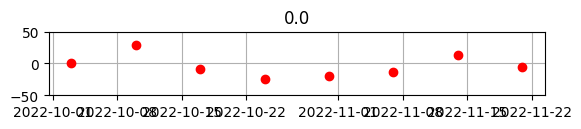

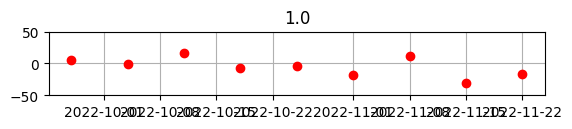

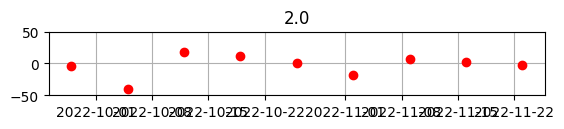

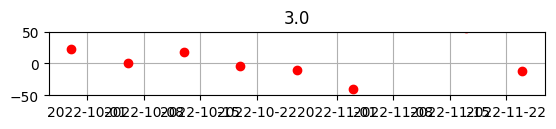

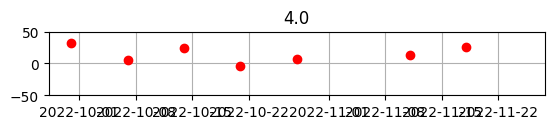

In [67]:
for group, frame in menus_predictions.groupby('weekday'):

    subplotnum = int(group) + 511
    plt.subplot(subplotnum)
    plt.plot(frame.index, frame['dif'], 'ro')


    plt.grid(True)
    plt.ylim(-50, 50)

    plt.title(str(group))
    plt.show()

In [2]:
age = input()                                           # line 1
if age > 14:                                            # line 2
    print('Yes, you are allowed to watch this film!')   # line 3

TypeError: '>' not supported between instances of 'str' and 'int'

In [3]:
pickle_path = os.path.join('..', '..', 'data', 'features_by_date')
features_by_date = pd.read_pickle(pickle_path)
avg_num_people=features_by_date.iloc[150:len(features_by_date)][['weekday','filled_num_people_11_30']].groupby('weekday').mean()
(avg_num_people/460).iloc[0][0]

0.4184839524548552

In [43]:
p=0.42
pairs=2
n=460/pairs
np.sqrt(np.mean((pairs*(np.random.binomial(n, p, size=10000)-n*p))**2))

14.839530989893177

In [6]:
features_by_date.columns

Index(['date', 'num_people_10_00', 'label_num_people_12_33',
       'label_num_people_11_30', 'label_num_menus_sold',
       'label_difference_12_normalized',
       'label_difference_10_and_sold_normalized', 'zurich_vacation',
       'exp_moving_avg_0.1', 'log_exp_moving_avg_0.1', 'exp_moving_avg_0.2',
       'log_exp_moving_avg_0.2', 'exp_moving_avg_0.3',
       'log_exp_moving_avg_0.3', 'exp_moving_avg_0.4',
       'log_exp_moving_avg_0.4', 'exp_moving_avg_0.5',
       'log_exp_moving_avg_0.5', 'exp_moving_avg_0.6',
       'log_exp_moving_avg_0.6', 'exp_moving_avg_0.7',
       'log_exp_moving_avg_0.7', 'exp_moving_avg_0.8',
       'log_exp_moving_avg_0.8', 'exp_moving_avg_0.9',
       'log_exp_moving_avg_0.9', 'exp_moving_avg_1.0',
       'log_exp_moving_avg_1.0', 'weekday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Spring/Autumn', 'Summer', 'Winter',
       'month_quarter_0', 'month_quarter_1', 'month_quarter_2',
       'month_quarter_3', 'zuehlke_day', 'day_a

In [11]:
model_filename=os.path.join('pickled_models','sarimax_features_to_11_30_people_count.pkl')

with open(model_filename, 'rb') as pkl:
    sarimax_model=pickle.load(pkl)
    print(sarimax_model.predict(n_periods=5))
    #pickle_preds = pickle.load(pkl).predict(n_periods=5)

ValueError: When an ARIMA is fit with an X array, it must also be provided one for predicting or updating observations.

In [8]:
features=features_by_date[['label_num_people_11_30','zuehlke_day','before_after_holydays']]
features

,label_num_people_11_30,zuehlke_day,before_after_holydays
2022-03-01,159,0,0
2022-03-02,160,0,0
2022-03-03,132,0,0
2022-03-04,87,0,0
2022-03-07,132,0,0
...,...,...,...
2022-12-26,1,0,0
2022-12-27,31,0,0
2022-12-28,26,0,0
2022-12-29,18,0,0


In [50]:
train_test_boundary=150
predictions=np.zeros(len(features_by_date)-train_test_boundary)
df_predictions=pd.DataFrame(index=features_by_date.iloc[train_test_boundary:].index, data=predictions, columns=['predictions'])
df=features_by_date.iloc[train_test_boundary:]['label_num_menus_sold'].copy()
df2=df_predictions.join(df)
df2.dropna(axis=0,inplace=True)
mean_absolute_error(df2['predictions'],df2['label_num_menus_sold'])

145.8409090909091

In [73]:
features_by_date.iloc[110:].index

Index([2022-08-02, 2022-08-03, 2022-08-04, 2022-08-05, 2022-08-08, 2022-08-09,
       2022-08-10, 2022-08-11, 2022-08-12, 2022-08-15, 2022-08-16, 2022-08-17,
       2022-08-18, 2022-08-19, 2022-08-22, 2022-08-23, 2022-08-24, 2022-08-25,
       2022-08-26, 2022-08-29, 2022-08-30, 2022-08-31, 2022-09-01, 2022-09-02,
       2022-09-05, 2022-09-06, 2022-09-07, 2022-09-08, 2022-09-09, 2022-09-12,
       2022-09-13, 2022-09-14, 2022-09-15, 2022-09-16, 2022-09-19, 2022-09-20,
       2022-09-21, 2022-09-22, 2022-09-23, 2022-09-26, 2022-09-27, 2022-09-28,
       2022-09-29, 2022-09-30, 2022-10-03, 2022-10-04, 2022-10-05, 2022-10-06,
       2022-10-07, 2022-10-10, 2022-10-11, 2022-10-12, 2022-10-13, 2022-10-14,
       2022-10-17, 2022-10-18, 2022-10-19, 2022-10-20, 2022-10-21, 2022-10-24,
       2022-10-25, 2022-10-26, 2022-10-27, 2022-10-28, 2022-10-31, 2022-11-01,
       2022-11-02, 2022-11-03, 2022-11-04, 2022-11-07, 2022-11-08, 2022-11-09,
       2022-11-10, 2022-11-11, 2022-11-14, 2022-11-1

In [75]:
features_by_date.columns


Index(['date', 'num_people_10_00', 'label_num_people_12_33',
       'label_num_people_11_30', 'label_num_menus_sold',
       'label_difference_12_normalized',
       'label_difference_10_and_sold_normalized', 'zurich_vacation',
       'exp_moving_avg_0.1', 'log_exp_moving_avg_0.1', 'exp_moving_avg_0.2',
       'log_exp_moving_avg_0.2', 'exp_moving_avg_0.3',
       'log_exp_moving_avg_0.3', 'exp_moving_avg_0.4',
       'log_exp_moving_avg_0.4', 'exp_moving_avg_0.5',
       'log_exp_moving_avg_0.5', 'exp_moving_avg_0.6',
       'log_exp_moving_avg_0.6', 'exp_moving_avg_0.7',
       'log_exp_moving_avg_0.7', 'exp_moving_avg_0.8',
       'log_exp_moving_avg_0.8', 'exp_moving_avg_0.9',
       'log_exp_moving_avg_0.9', 'exp_moving_avg_1.0',
       'log_exp_moving_avg_1.0', 'weekday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Spring/Autumn', 'Summer', 'Winter',
       'month_quarter_0', 'month_quarter_1', 'month_quarter_2',
       'month_quarter_3', 'zuehlke_day', 'day_a

In [80]:
print('* * * *')
print('*     *')
print('*     *')
print('* * * *')

* * * *
*     *
*     *
* * * *


In [31]:
type(df)
features_by_date.apply(lambda row: math.log(row['label_num_people_11_30']) if row['label_num_people_11_30']>0 else np.nan,axis=1)

NameError: name 'df' is not defined

In [7]:
features_by_date['log_num_people_11_30']= features_by_date.apply(lambda row: math.log(row['filled_num_people_11_30']),axis=1)

In [8]:
for i in features_by_date.index:
    features_by_date.loc[i,'log_num_people_11_2']=math.log(features_by_date.loc[i,'filled_num_people_11_30'])

In [1]:
features_by_date

NameError: name 'features_by_date' is not defined

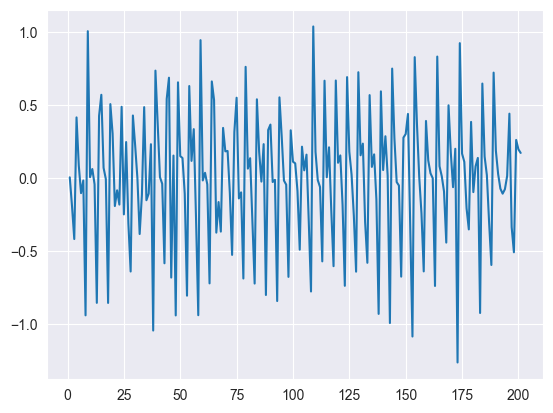

In [10]:
plt.plot(df['log_difference_11_30'])


(array([-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18,
        -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,
         -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
          9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
         22,  23,  24,  25,  26,  27,  28,  29,  30]),
 array([ 0.71595628, -0.22243975, -0.15272547, -0.18018128, -0.17514781,
         0.71619906, -0.17649053, -0.20592721, -0.14999924, -0.18313028,
         0.72296132, -0.17436886, -0.21101892, -0.1563879 , -0.19709124,
         0.72938211, -0.14757338, -0.23212623, -0.18475822, -0.17268126,
         0.7872228 , -0.23407987, -0.18933079, -0.18322695, -0.18373252,
         0.76203222, -0.19291915, -0.17782096, -0.22130717, -0.28497391,
         1.        , -0.28497391, -0.22130717, -0.17782096, -0.19291915,
         0.76203222, -0.18373252, -0.18322695, -0.18933079, -0.23407987,
         0.7872228 , -0.17268126, -0.18475822, -0.23212623, -0.147573

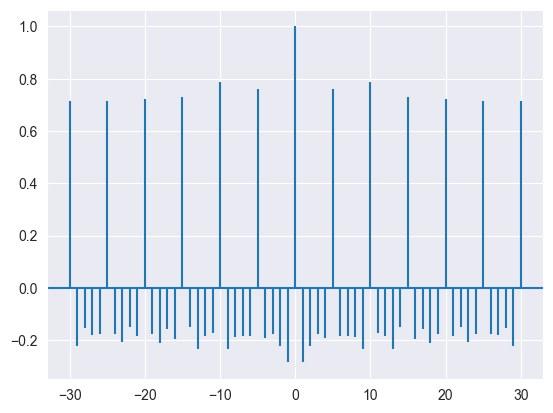

In [11]:
plt.acorr(df['log_difference_11_30'].values.ravel(),maxlags=30)


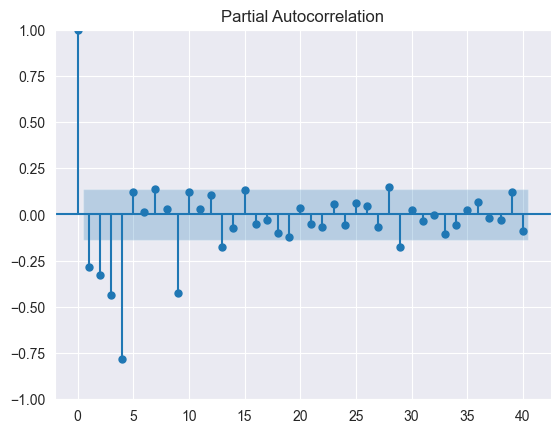

In [12]:
sm.graphics.tsa.plot_pacf(df['log_difference_11_30'].values.ravel(), lags=40, method="ywm")
plt.show()

In [16]:
math.log(0.99,1.01)

-1.0100504196100692

In [6]:
actual=np.ones(150)
pred=np.arange(50,200)/100
np.abs(np.log(pred/actual))#*math.log(math.exp(1),2)
np.mean(np.abs(np.log(pred / actual)))

0.3598166248909796

In [9]:
np.exp(actual)

array([2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828

In [5]:
actual

NameError: name 'actual' is not defined